# Support Vector Machines

### Linear Support Vector Machines

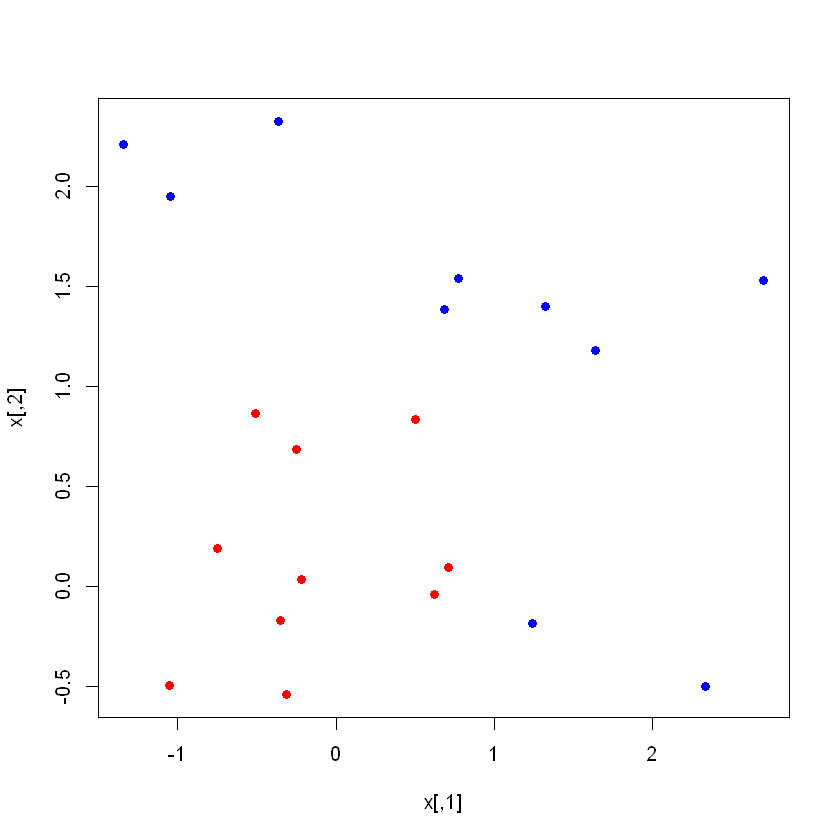

In [11]:
set.seed(10111)

x <- matrix(rnorm(40),20,2)
y <- rep( c(-1,1), c(10,10))
x[y == 1,] <- x[y == 1,] + 1 # Moving the mean from zero to one for better data separation
plot(x, col= y+3, pch = 19)

In [12]:
library(e1071) # Name of the function comes from a number of a room in the University of Berlin
dat <- data.frame(x, y=as.factor(y))
svmfit <- svm(y ~ .,data = dat, kernel = "linear", cost = 10, scale = FALSE) #Notice we specify the type of kernel and cost
print(svmfit)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.5 

Number of Support Vectors:  6



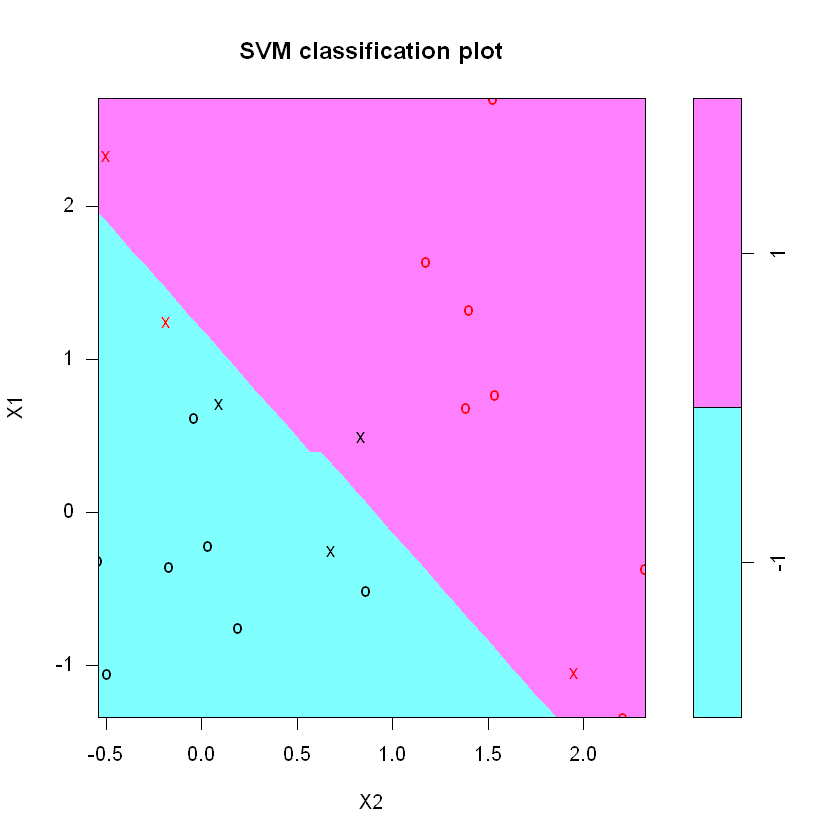

In [15]:
plot(svmfit, dat)

### Creating our own plot to observe the support vector machine classification
1. Make a grid of values of $x_1$ and $x_2$.
2. Predict the classification at each point in the grid.
3. color code each classification and plot the image.

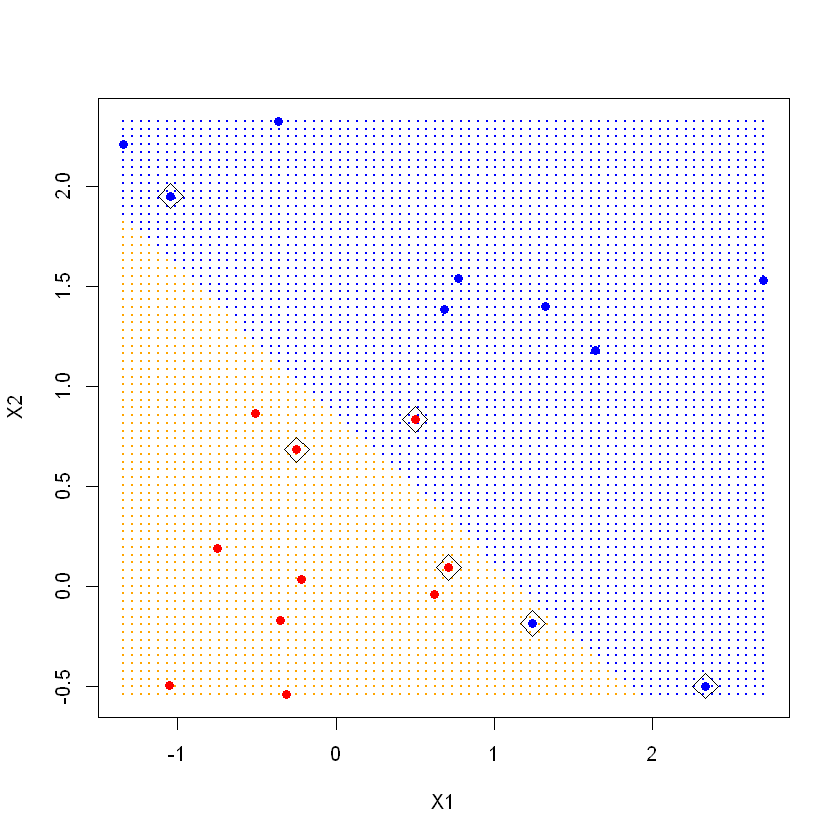

In [27]:
make.grid <- function (x, n = 75) {
    grange <- apply(x,2,range) #Range of each x value
    x1 <- seq(from = grange[1,1],to = grange[2,1], length = n)
    x2 <- seq(from = grange[1,2],to = grange[2,2], length = n)
    return(expand.grid(X1 = x1, X2 = x2)) #lattice function
}
xgrid <- make.grid(x)
ygrid <- predict(svmfit,xgrid)
plot(xgrid, col = c("orange","blue")[as.numeric(ygrid)],pch = 20, cex = .2)
points(x,col = y + 3, pch = 19)
points(x[svmfit$index,], pch = 5, cex = 2)

The points with the square represent the support vectors used to make the margin under SVM. 

### Extracting linear coefficients from SVM Method. 
Check Chapter 12 of Book "Elements of Statistical Learning" for more details about how this formula is derived.

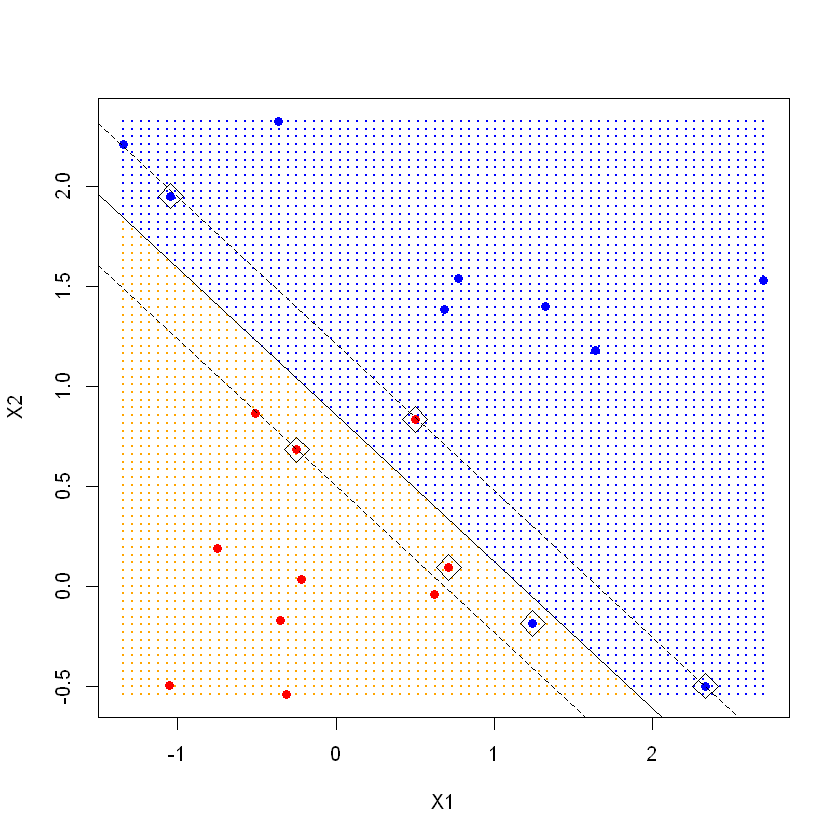

In [32]:
beta = drop(t(svmfit$coefs)%*%x[svmfit$index,])
beta0 = svmfit$rho
plot(xgrid, col = c("orange","blue")[as.numeric(ygrid)],pch = 20, cex = .2)
points(x,col = y + 3, pch = 19)
points(x[svmfit$index,], pch = 5, cex = 2)
abline(beta0/beta[2],-beta[1]/beta[2]) #the slope and intersection are derived from the formula
#Margin
abline((beta0-1)/beta[2],-beta[1]/beta[2], lty = 2)
abline((beta0+1)/beta[2],-beta[1]/beta[2], lty = 2)